O dataset possui avaliações de diversos anos, portanto, a ideia é primeiramente converter as datas para informarem apenas o mês e ano da respectiva avaliação (usamos uma função customizada - UDF para setar as datas sempre para o dia 1 do respectivo mês), e após isso, agregar por data para saber quantas avaliações foram feitas em um dado ano e mês. Por fim, plotamos um gráfico a partir dos dados agregados.

Primeiramente, convertemos as datas e colocamos todas para o dia 1 do respectivo mês (permitindo agregar posteriormente por mês e ano da avaliação).

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, concat_ws, split, hour, explode, date_format, dayofmonth, udf, col
import datetime
from pyspark.sql.types import StringType, DateType
from seaborn import lineplot


spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

df = spark.read.json('file:///home/ec2-user/eiffel-tower-reviews.json').select('createdAt')

def date_string_to_year_with_month(date):
    return datetime.datetime.strptime(date, '%B %d, %Y').replace(day=1)


datestring_to_custom_date = udf(date_string_to_year_with_month, DateType())
df = df.select(datestring_to_custom_date(df.createdAt).alias("date"))
df.show()

Setting default log level to "

22/12/08 20:33:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
+----------+
|      date|
+----------+
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
|2017-05-01|
+----------+
only showing top 20 rows



Com as datas tratadas, agregamos por data e realizamos a contagem

In [2]:
aggregated_df = df.groupBy("date").count()

Por fim, ordenamos os dados, tendo as contagens de avaliações por mês e ano.

In [3]:
ordered_df = aggregated_df.orderBy("date")
ordered_df.show(100)

+----------+-----+
|      date|count|
+----------+-----+
|2015-07-01|   51|
|2015-08-01|  481|
|2015-09-01|  423|
|2015-10-01|  421|
|2015-11-01|  286|
|2015-12-01|  268|
|2016-01-01|  285|
|2016-02-01|  292|
|2016-03-01|  304|
|2016-04-01|  372|
|2016-05-01|  352|
|2016-06-01|  396|
|2016-07-01|  467|
|2016-08-01|  487|
|2016-09-01|  394|
|2016-10-01|  428|
|2016-11-01|  243|
|2016-12-01|  143|
|2017-01-01|  226|
|2017-02-01|  164|
|2017-03-01|  212|
|2017-04-01|  326|
|2017-05-01|  158|
+----------+-----+



Com os dados já agregados, plotamos um gráfico convertendo o dataframe do Spark em um Dataframe do Pandas. Os gráficos são plotados usando a biblioteca Seaborn.

<AxesSubplot:xlabel='date', ylabel='count'>

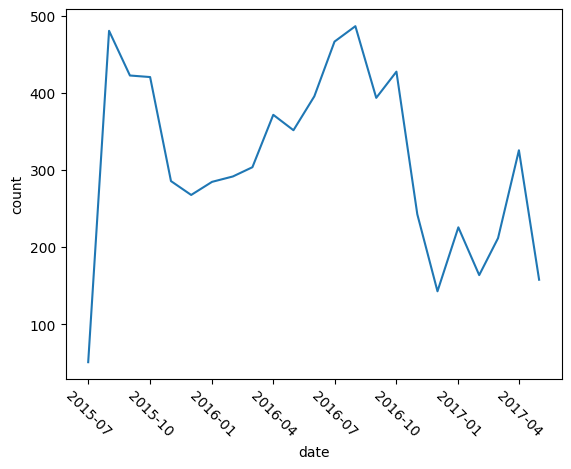

In [4]:
import matplotlib.pylab as plt
plt.xticks(rotation=-45)

lineplot(data=ordered_df.toPandas(), x="date", y="count")